## Análise exploratória

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('data.csv')

#df = df.dropna()

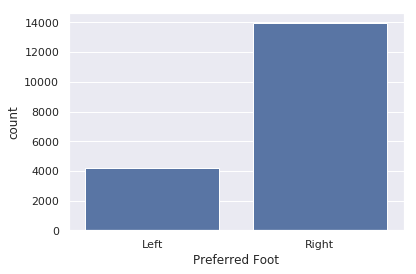

In [3]:
sns.countplot(x="Preferred Foot", data=df, color='b')
plt.show()

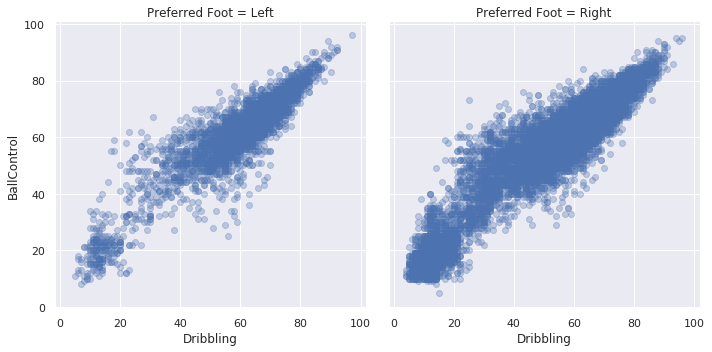

In [4]:
# Quem é melhor: canhotos ou destros? Para avaliar esse questionamento, como o controle de bola e a habilidade 
# de drible dos jogadores são bons indicativos da "habilidade com o pé", usaremos esses para compará-los. 
# Visualizando os diagramas de dispersão é possível observar que os jogadores canhotos estão concentrados 
# no canto superior direito, já os destros estão bem distribuídos. Ou seja, a tendência é que um jogador 
# canhoto aleatório, possua melhor controle de bola e drible que um jogador destro.

g = sns.FacetGrid(df, col="Preferred Foot", height=5)
g.map(plt.scatter, "Dribbling", "BallControl", alpha=.3)
plt.show()

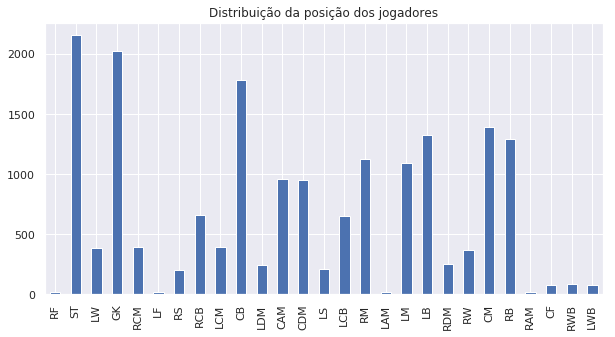

In [5]:
posicoes = df['Position'].dropna().unique()
posicoes_cnt = []
for i in posicoes:
    posicoes_cnt.append(df['Position'].tolist().count(i))

plt.figure(figsize=(10,5))
plt.title("Distribuição da posição dos jogadores")
df_pos = pd.Series(posicoes_cnt, posicoes)
df_pos.plot.bar()
plt.show()

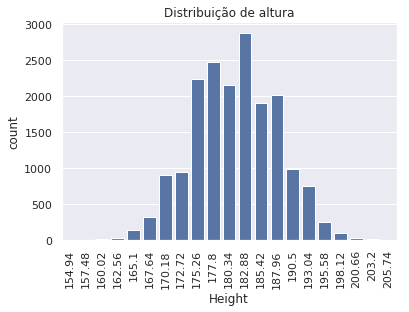

In [152]:
## Distribuição da altura dos jogadores

plt.title("Distribuição de altura")

ax = sns.countplot(x="Height", data=df, color='b')
labels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels([str(round(float(label), 2)) for label in labels])
plt.xticks(rotation=90)
plt.show()

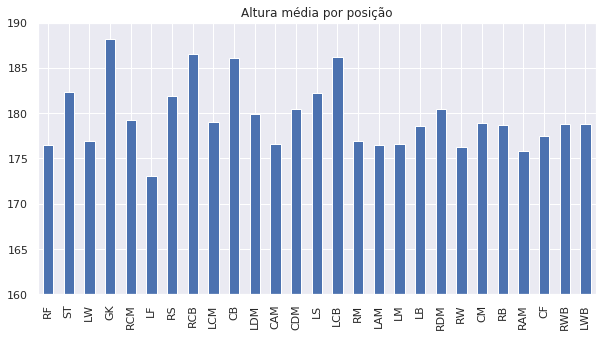

In [154]:
## Altura média por posição

# Evidentemente, jogadores de defesa (GK, CB, RCB, LCB) e tendem ser maiores, enquanto que jogadores que necessitam 
# de mais mobilidade, como alguns atacantes (LF e RF) e meias (CAM, RAM, etc.), possuem menor altura.

avg_alt_pos = []

for i in posicoes:
    avg_alt_pos.append(df[df['Position'] == i]['Height'].mean())


plt.figure(figsize=(10,5))
plt.title("Altura média por posição")

df_avg_alt_pos = pd.Series(avg_alt_pos, posicoes)
df_avg_alt_pos.plot.bar(color='b')

plt.ylim((160, 190))
plt.show()

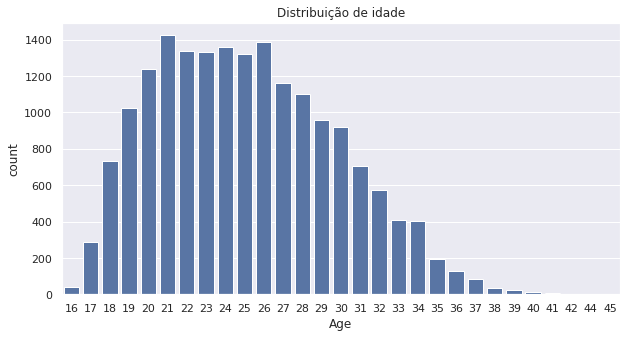

In [61]:
## Distribuiçao de idade

# A grande maioria dos jogadores está concentrada entre 19 e 30 anos.

plt.figure(figsize=(10, 5))
plt.title("Distribuição de idade")
age_distrib = sns.countplot(x="Age", data=df, color='b')

plt.show(age_distrib)

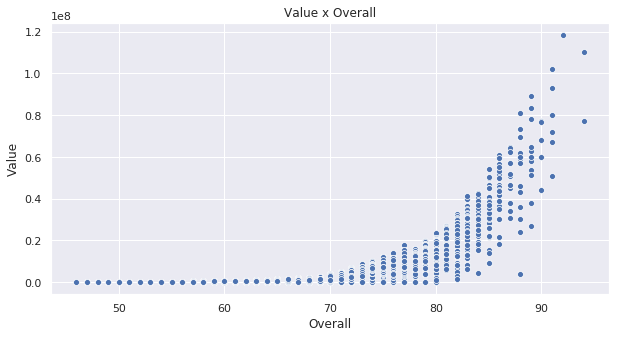

ρ = 0.908123981757991


In [155]:
import scipy.stats as ss

## Correlações

# Por apresentar alguns outliers, foi utilizada a correlação de Spearman, para as colunas "Overall" e "Value"
# Como esperado, jogadores com overall alto possuem alto valor de mercado, estando os dois atributos altamente
# correlacionados, ρ = 0.91. Entretanto, ainda é possível fazer um bom negócio e encontrar jogadores com Overall 
# alto e preço baixo.

value_overall, p_value = ss.spearmanr(df["Overall"], df["Value"])

txt = "ρ = " + str(value_overall)

plt.figure(figsize=(10,5))
plt.title("Value x Overall")
ax = sns.scatterplot(x="Overall", y="Value", data=df)

plt.show()

print(txt)

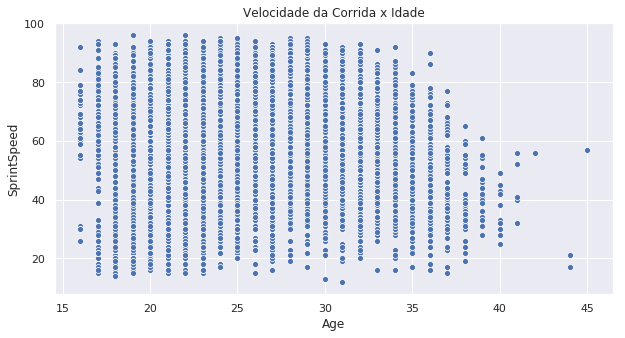

ρ = nan


In [159]:
# Conforme vão ficando mais velhos, os jogadores tendem a perder velocidade na corrida.

speed_age, p_value = ss.pearsonr(df["Age"], df["SprintSpeed"])

plt.figure(figsize=(10,5))
plt.title("Velocidade da Corrida x Idade")
ax = sns.scatterplot(x="Age", y="SprintSpeed", data=df)

plt.show()

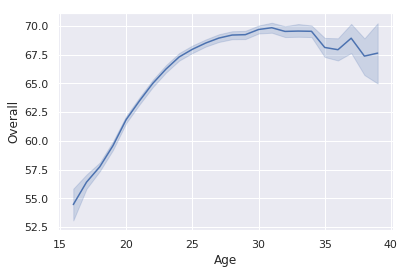

Número de jogadores com 40 ou mais anos: 22


In [114]:
## Gráfico de linha com idade e overall

ages = df[["Age", "Overall"]]

# Usando apenas os com idade menor que 40 
ages = ages[ages["Age"] < 40]

sns.lineplot(x="Age", y="Overall", data=ages)
plt.show()

# número de jogadores com idade >= 40 anos é muito pequena, G. Buffon é o outlier que puxa para cima a média
# 40 anos e Overall de 88

# Como existem apenas 22 jogadores no dataset com 40 ou mais anos, estes foram removidos para plotar o gráfico
# de Overall vs Idade. Como era de se esperar, os jogadores tendem a evoluir conforme ficam maduros e atingem
# seu pico de perfomance aos 30 - 32 anos, e, a partir daí, tendem a perder desempenho, tendo uma leve melhora
# aos 37 - 38 anos.

over_40 = df[df["Age"] >= 40]
print("Número de jogadores com 40 ou mais anos:", len(over_40))

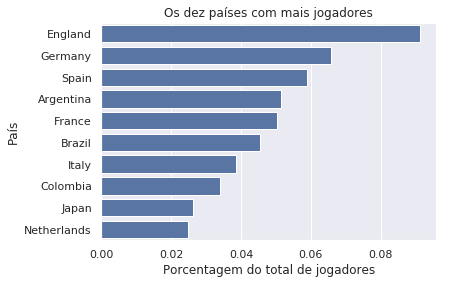

In [82]:
## Acho que esse gráfico não é mais necessário por causa do cloromapa abaixo

## Gráfico de barra com porcentagem dos países representados

countries = df.groupby("Nationality", as_index = False).count().sort_values("ID", ascending=False)

countries = countries[["Nationality", "ID"]]

countries = countries.rename(columns={"Nationality": "Nationality", "ID":"Count"})

total = countries["Count"].sum()

countries["Percentages"] = countries["Count"]/total

sns.barplot(x="Percentages", y="Nationality", data=countries[:10], color='b')

plt.title("Os dez países com mais jogadores")
plt.xlabel("Porcentagem do total de jogadores")
plt.ylabel("País")

plt.show()

In [54]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [81]:
# A maior parte dos jogadores presentes no conjunto de dados joga em times da Europa e da América do Sul, o que
# evidencia a importância desses continentes no contexto do futebol mundial.

count = pd.DataFrame(df.groupby('Nationality')['Overall'].count().reset_index())

count.columns = ['Nationality', 'Count']

england = count[count["Nationality"] == "England"]
scotland = count[count["Nationality"] == "Scotland"]
wales = count[count["Nationality"] == "Wales"]
n_ireland = count[count["Nationality"] == "Northern Ireland"]

uk_count = int(england["Count"]) + int(scotland["Count"]) + int(wales["Count"]) + int(n_ireland["Count"])


count.loc[count["Nationality"] == "England"] = ["United Kingdom", uk_count]

uk = count[count["Nationality"] == "United Kingdom"]

trace = [go.Choropleth(
            colorscale = 'YlOrRd',
            locationmode = 'country names',
            locations = count['Nationality'],
            text = count['Nationality'],
            z = count['Count'],
)]

layout = go.Layout(title = 'Quantidade de jogadores por país')

fig = go.Figure(data = trace, layout = layout)
py.iplot(fig)

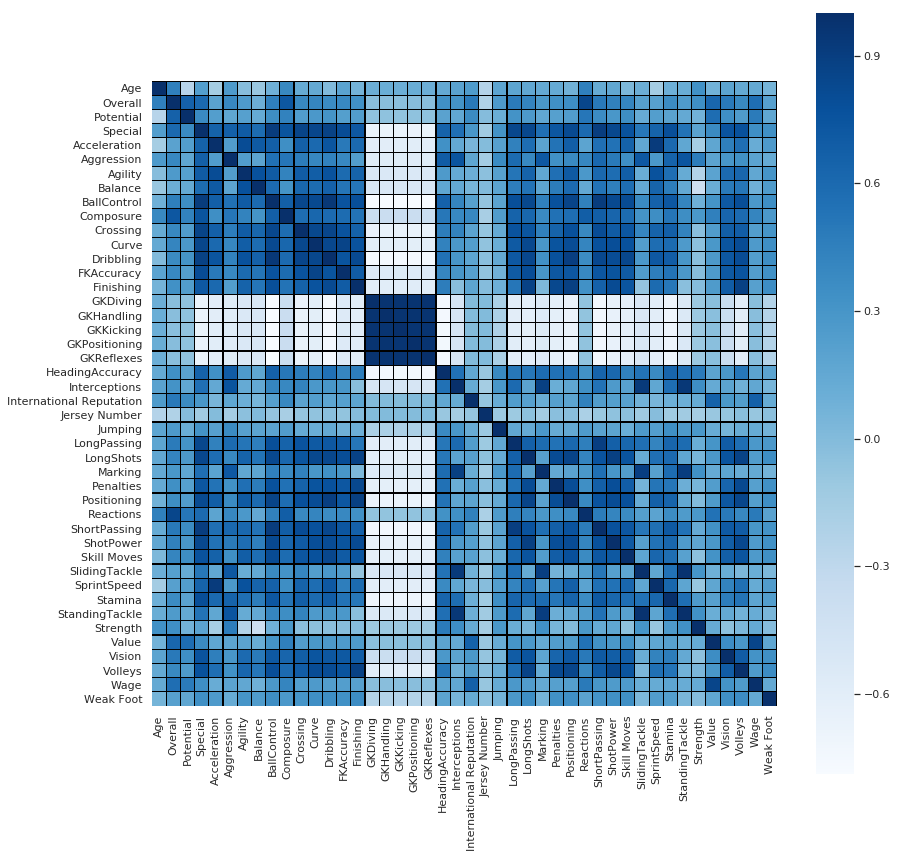

In [125]:
# Os atributos de goleiro estão altamente relacionados entre si, e muito pouco relacionados com os outros
# atributos, claramente indicando a separação do dataset em dois clusters: goleiros e "não-goleiros".
# Além disso, atributos como, por exemplo, 'Drible', 'Curve', 'Crossing' e 'Finishing', relacionados à habilidade
# física do jogador também estão altamente correlacionados. Por fim, como mais um exemplo, jogadores com 'Strengh' 
# alto possuem pouco 'Control', 'Balance', 'Agility', que são atributos indicativos de velocidade.

chosen_columns = df[['Name','Age','Nationality','Overall','Potential','Special','Acceleration','Aggression',
'Agility','Balance','BallControl', 'Composure','Crossing','Curve','Club','Dribbling','FKAccuracy',
'Finishing','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','HeadingAccuracy','Interceptions',
'International Reputation','Jersey Number','Jumping','Joined','LongPassing','LongShots','Marking','Penalties',
'Position','Positioning','Preferred Foot','Reactions','ShortPassing','ShotPower','Skill Moves','SlidingTackle',
'SprintSpeed','Stamina','StandingTackle','Strength','Value','Vision','Volleys','Wage','Weak Foot','Work Rate']]

plt.figure(figsize=(14,14))
sns.heatmap(chosen_columns.corr(),linewidths=0.1,linecolor='black',square=True,cmap='Blues')
plt.show()

## UEFA Champions League

In [36]:
## Dataframe com o top 8 da UEFA Champions League 2018-19

tot = df[df['Club'] == 'Tottenham Hotspur']
city = df[df['Club'] == 'Manchester City'] 

ajax = df[df['Club'] == 'Ajax']
juv = df[df['Club'] == 'Juventus']

united = df[df['Club'] == 'Manchester United']
barca = df[df['Club'] == 'FC Barcelona']

liv = df[df['Club'] == 'Liverpool']
porto = df[df['Club'] == 'FC Porto']

frames = [tot, city, ajax, juv, united, barca, liv, porto]

champions = pd.concat(frames)

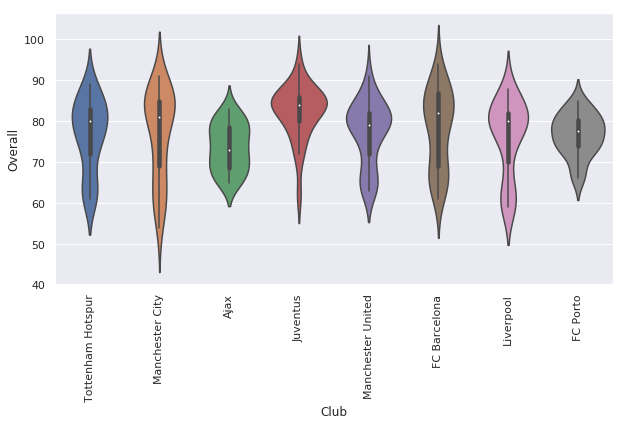

In [40]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Club', y='Overall', data=champions)
plt.xticks(rotation=90)
plt.show()

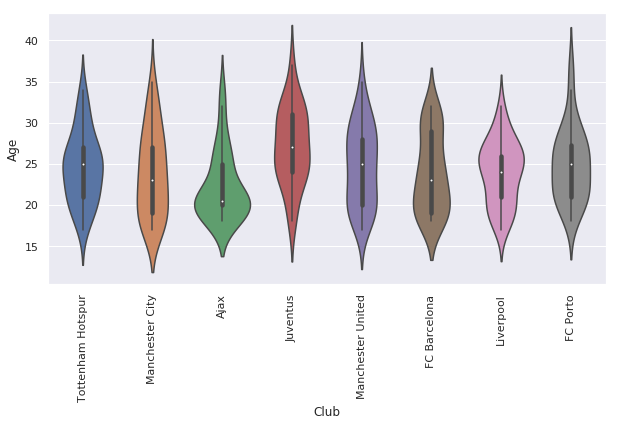

In [42]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Club', y='Age', data=champions)
plt.xticks(rotation=90)
plt.show()

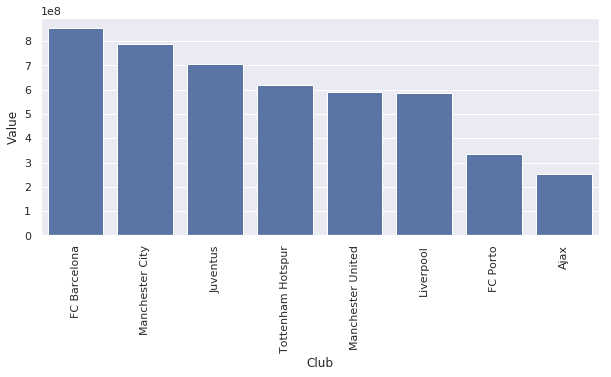

In [80]:
# Mesmo com times relativamente "baratos", o FC Porto e o Ajax conseguiram bons resultados no campeonato.
# Com o Porto avançando até as quartas de finais e o Ajax com um surpreendente resultado sobre a Juventus 
# para alcançar as semifinais.

cost = pd.DataFrame(champions.groupby('Club')['Value'].sum().reset_index()).sort_values(by='Value', ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x='Club', y='Value', data=cost, color='b')
plt.xticks(rotation=90)
plt.show()